#### A3: SAR processing

This notebook demonstrates how the use of the [`rasterio`](https://rasterio.readthedocs.io/en/stable/) library for handling geospatial raster data, specifically focusing on Sentinel-1 GRD (Ground Range Detected) products which is one of the data types in my group project *(PySARflow :An open-source python library for SAR data processing)*. 


##### 1. Setup
Install the necessary libraries

In [2]:
import os              # directory management
import tempfile        # Create temporary folders for data processing
import rasterio        # Read and work with raster data
import matplotlib.pyplot as plt  # Visualize images
import numpy as np     # Numerical operations

##### 2. Functions   
The defined functions make use of:  

`rasterio`  
* *Open and read Sentinel-1 SAR data*: [rasterio.open()](https://rasterio.readthedocs.io/en/stable/api/rasterio.html#rasterio.open) is used to open the .tiff band files. Within the with block, [read(1)](https://rasterio.readthedocs.io/en/stable/api/rasterio.html#rasterio.DatasetReader.read) extracts the raster band data into a NumPy array.  
* *Access raster metadata*: The open dataset object (`src`) provides access to useful metadata such as:
    * image metadata  [src.profile](https://rasterio.readthedocs.io/en/stable/api/rasterio.io.html#rasterio.io.DatasetReader.profile)  


In [ ]:
# Extracts the path to the specific bands
def get_band(safe_folder, band='vv'):
    """
    Returns the full file path for a given polarization band ('vv' or 'vh')
    within the Sentinel-1 .SAFE measurement folder.

    Parameters:
    - safe_folder (str): Path to the .SAFE folder
    - band (str): 'vv' or 'vh'

    Returns:
    - str: Full path to the selected band file
    """
    measurement_folder = os.path.join(safe_folder, "measurement") # checks the measurement folder
    files = os.listdir(measurement_folder)
    band_file = [f for f in files if f"-{band.lower()}-" in f.lower()] # checks for the band file (vv or vh)
    if not band_file:
        raise FileNotFoundError(f"No file found for band '{band}'")
    return os.path.join(measurement_folder, band_file[0])

In [ ]:
# Loads the band raster into an array and retrieves metadata.  
def read_band(band_path):
    """
    Reads the raster data and profile using rasterio.

    Parameters:
    - band_path (str): Full path to the band raster file

    Returns:
    - np.ndarray: Band data array
    - dict: Raster profile (metadata)
    """
    with rasterio.open(band_path) as src: 
        band_data = src.read(1)
        profile = src.profile
    return band_data, profile


In [21]:
# read the file
safe_folder = r"data\sample_data_COG.SAFE"

C:\Users\Ethel Ogallo\AppData\Local\Temp\ipykernel_14964\2797288503.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(vv), cmap='gray', vmin=0, vmax=30) # converts the SAR values to logarithmic scale to enhance contrast for visualization


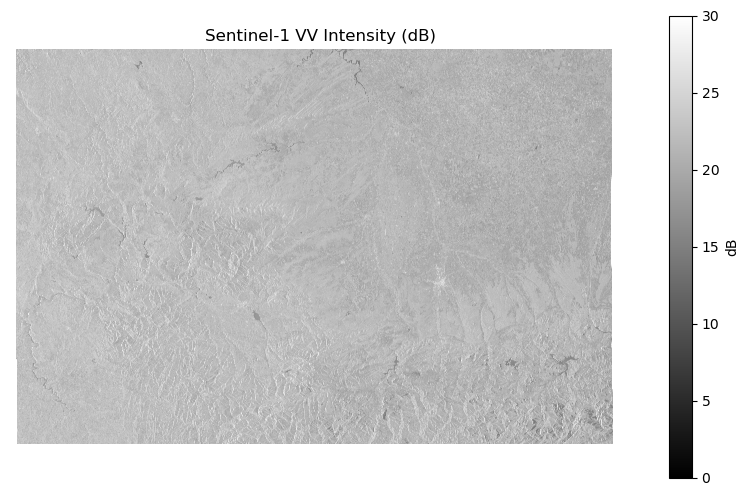

In [22]:
# Read the VV band
vv_path = get_band(safe_folder, band='vv')
vv_data, vv_profile = read_band(vv_path)

# plot VV band
with rasterio.open(vv_path) as src:
    vv = src.read(1)
    profile = src.profile

plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(vv), cmap='gray', vmin=0, vmax=30) # converts the SAR values to logarithmic scale to enhance contrast for visualization
plt.title("Sentinel-1 VV Intensity (dB)")
plt.colorbar(label='dB')
plt.axis('off')
plt.show()

C:\Users\Ethel Ogallo\AppData\Local\Temp\ipykernel_14964\685581977.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10 * np.log10(vh), cmap='gray', vmin=0, vmax=30) # converts the SAR values to logarithmic scale to enhance contrast for visualization


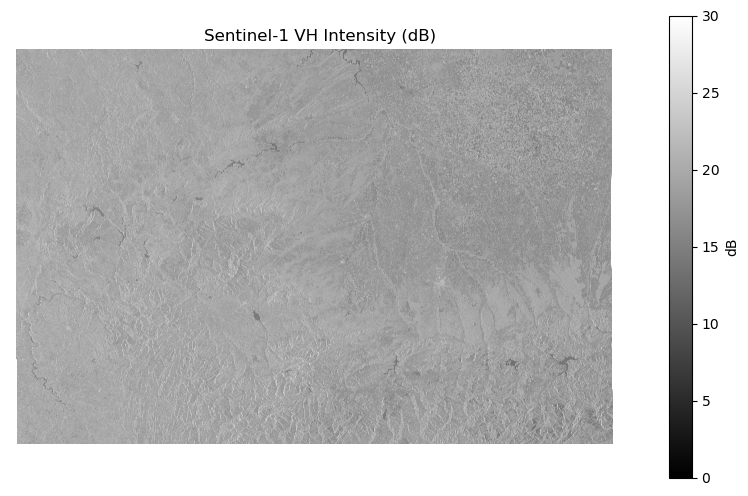

In [23]:
# Read VH
vh_path = get_band(safe_folder, band='vh')
vh_data, vh_profile = read_band(vh_path)

# plot the VH band
with rasterio.open(vh_path) as src:
    vh = src.read(1)
    profile = src.profile

plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(vh), cmap='gray', vmin=0, vmax=30) # converts the SAR values to logarithmic scale to enhance contrast for visualization
plt.title("Sentinel-1 VH Intensity (dB)")
plt.colorbar(label='dB')
plt.axis('off')
plt.show()
